In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
import torch

In [2]:
def load_reward(path):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    return ckpt['avg_reward'], ckpt['std_reward'], ckpt['enc_losses']

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

In [3]:
param = []
r_mean = []
r_std = []
enc_loss = []
for d in filter(lambda x:'Pendulum' in x,os.listdir(os.getcwd())):
    if os.path.exists(os.path.join(d,"model_parameters.txt")):
        with open(os.path.join(d,'model_parameters.txt')) as f:
            param.append(json.loads(f.read()))
        r_mean_, r_std_, enc_loss_ = load_reward(d)
        param[-1]['r_mean'] = np.array(r_mean_)
        param[-1]['r_std'] = np.array(r_std_)
        param[-1]['enc_loss'] = np.array(enc_loss_)
        
data = pd.DataFrame.from_dict(param)
data['name'] = [i.split('/')[-1] for i in data['save_dir']]

In [9]:
pd.set_option('display.max_columns', None)
data

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,save_period,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,epochs_belief_training,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,r_mean,r_std,enc_loss,use_belief,stoch_mdp_param,stoch_mdp_distrib,name,max_mean_r,cv_speed
0,train,Pendulum,0,10,False,50,0.7,True,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,300,10000,1,100000,10000,0.005,0.005,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run28,"[-1314.0713290993297, -1172.5814728671662, -11...","[278.3906883608458, 369.3890987434081, 369.465...","[4.455460548400879, 4.561949253082275, 4.57046...",NaN,NaN,NaN,Pendulum-run28,-704.985560,1000
1,train,Pendulum-v0,0,10,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,200,10000,1,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1651.253358335215, -1434.2494930050323, -149...","[482.84896923808446, 368.9193173623081, 429.26...","[4.452426910400391, 4.5694499015808105, 4.5531...",True,1.0,Gaussian,Pendulum-v0-20-12-22_23_32_656352,-780.516364,1000
2,train,Pendulum-v0,0,10,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,200,10000,2,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1651.253358335215, -1441.0748199457425, -151...","[482.84896923808446, 365.65970601894776, 413.9...","[4.402505874633789, 4.494041919708252, 4.46607...",True,1.0,Gaussian,Pendulum-v0-20-12-24_13_32_972251,-699.393470,1000
3,train,Pendulum-v0,0,10,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,200,10000,2,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1674.6597073147873, -1457.0022640119987, -14...","[453.68238196655807, 362.57381480378484, 416.0...","[4.282286643981934, 4.3868913650512695, 4.4100...",True,1.0,Gaussian,Pendulum-v0-20-12-24_13_34_293193,-712.132075,1000
4,train,Pendulum-v0,0,10,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,100,10000,2,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1651.253358335215, -1441.0748199457425, -151...","[482.84896923808446, 365.65970601894776, 413.9...","[4.402505874633789, 4.494041919708252, 4.46607...",True,1.0,Gaussian,Pendulum-v0-20-12-27_13_14_096802,-754.581426,1000
5,train,Pendulum-v0,0,10,False,50,0.7,False,5000,1000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,600,10000,2,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1651.253358335215, -1441.0748199457425, -151...","[482.84896923808446, 365.65970601894776, 413.9...","[4.402505874633789, 4.494041919708252, 4.46607...",True,1.0,Gaussian,Pendulum-v0-20-12-27_17_47_680131,-684.479741,1000
6,train,Pendulum-v0,0,10,False,50,0.7,False,5000,2000,250,0.99,0.001,100,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,800,10000,2,100000,10000,0.010,0.010,64,2,1,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-v0-Results/Pendulum-v0...,"[-1651.253358335215, -1441.0748199457425, -15

In [17]:
print('Different columns: \n')
for c in data.columns:
    a = data[c].values
    if not (a[0] == a).all():
        print('\t -  '+c+'\n')

Different columns: 

	 -  env

	 -  force_stoch_env

	 -  epochs

	 -  pretrain_epochs

	 -  epochs_belief_training

	 -  train_enc_iters

	 -  enc_lr

	 -  maf_lr

	 -  hidden_dim

	 -  save_dir



C:\Users\pierr\Anaconda3\envs\dmdp\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


AttributeError: 'bool' object has no attribute 'all'

In [4]:
for i, r in enumerate(data['r_mean']):
    m = np.argmax(r)
    print('{0:<40} - Max mean reward {1:<20} -  at epoch {2}'.format(data['name'][i],r[m],m))
    
data['max_mean_r'] = [max(r) for r in data['r_mean']]
data['cv_speed'] = [time_to_cv(r) for r in data['r_mean']]

Pendulum-run28                           - Max mean reward -704.9855597331358   -  at epoch 916
Pendulum-v0-20-12-22_23_32_656352        - Max mean reward -780.5163639305408   -  at epoch 977
Pendulum-v0-20-12-24_13_32_972251        - Max mean reward -699.3934704834362   -  at epoch 968
Pendulum-v0-20-12-24_13_34_293193        - Max mean reward -712.1320752304051   -  at epoch 950
Pendulum-v0-20-12-27_13_14_096802        - Max mean reward -754.5814256556228   -  at epoch 970
Pendulum-v0-20-12-27_17_47_680131        - Max mean reward -684.4797411588365   -  at epoch 979
Pendulum-v0-20-12-28_03_10_220085        - Max mean reward -523.9385612154346   -  at epoch 1889
Pendulum-v0-20-12-28_03_12_907191        - Max mean reward -470.2019359950341   -  at epoch 1924
Pendulum-v0-20-12-29_12_54_499068        - Max mean reward -420.52355521100134  -  at epoch 1992


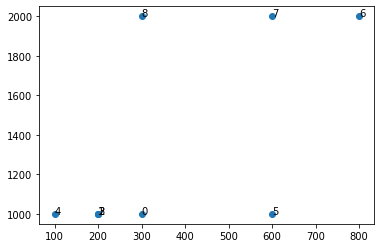

In [14]:
fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['cv_speed'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['cv_speed'][i]))

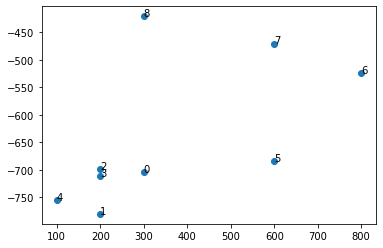

In [12]:
fig, ax = plt.subplots()
plt.scatter(data['epochs_belief_training'], data['max_mean_r'])
for i in range(len(data)):
    ax.annotate(i, (data['epochs_belief_training'][i], data['max_mean_r'][i]))

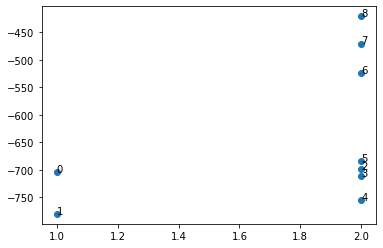

In [19]:
fig, ax = plt.subplots()
plt.scatter(data['train_enc_iters'], data['max_mean_r'])
for i in range(len(data)):
    ax.annotate(i, (data['train_enc_iters'][i], data['max_mean_r'][i]))